## import Standard Libraries

In [141]:
import pandas as pd

In [142]:
import matplotlib.pyplot as plt

In [143]:
import numpy as np

In [144]:
import seaborn as sns

## Read Data

In [187]:
df=pd.read_csv("amazon_prime_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [146]:
df.drop(["show_id"],axis=1,inplace=True)
df.drop(["description"],axis=1,inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [147]:
df.duplicated().sum()

0

In [148]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


### Check missing Value in Datasets

In [150]:
df.isna().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

## Filling the null values

In [151]:
df["director"].fillna("Unavailable",inplace=True)
df["cast"].fillna("Unavailable",inplace=True)
df["country"].fillna("Unavailable",inplace=True)
df["date_added"]=df["date_added"].ffill()
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])


C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\3726608651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unavailable",inplace=True)
C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\3726608651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [152]:
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [153]:
df["date_added"].unique()

array(['March 30, 2021', 'April 1, 2021', 'April 4, 2021',
       'April 10, 2021', 'April 17, 2021', 'April 24, 2021',
       'May 2, 2021', 'June 3, 2021', 'April 13, 2021', 'April 20, 2021',
       'April 26, 2021', 'April 27, 2021', 'April 30, 2021',
       'May 1, 2021', 'May 9, 2021', 'May 11, 2021', 'May 12, 2021',
       'May 13, 2021', 'May 18, 2021', 'May 19, 2021', 'May 22, 2021',
       'May 24, 2021', 'May 29, 2021', 'June 4, 2021', 'June 11, 2021',
       'June 12, 2021', 'June 15, 2021', 'June 18, 2021', 'June 20, 2021',
       'June 21, 2021', 'June 22, 2021', 'June 23, 2021', 'June 24, 2021',
       'June 25, 2021', 'June 26, 2021', 'June 29, 2021', 'July 1, 2021',
       'July 3, 2021', 'July 8, 2021', 'July 12, 2021', 'July 16, 2021',
       'July 17, 2021', 'July 20, 2021', 'July 23, 2021', 'July 24, 2021',
       'July 26, 2021', 'July 27, 2021', 'August 1, 2021',
       'August 4, 2021', 'August 6, 2021', 'August 14, 2021',
       'August 15, 2021', 'August 16, 20

In [154]:
df["date_added"]=pd.to_datetime(df["date_added"])
                                


## Top 10 directors with most directed movies

In [155]:
filtered_directors=df[df["director"]!="Unavailable"]

In [156]:
top_directors=filtered_directors["director"].value_counts().head(10)

In [157]:
top_directors

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\3598691186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values,y=top_directors.index,palette="plasma")


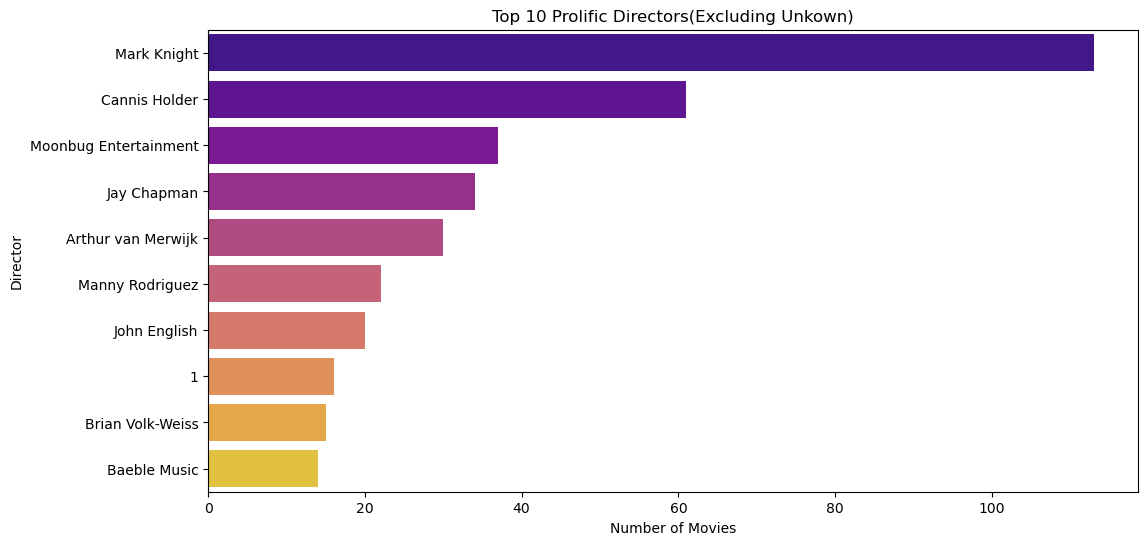

In [158]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values,y=top_directors.index,palette="plasma")
plt.title("Top 10 Prolific Directors(Excluding Unkown)")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

In [159]:
filtered_actors=df[df["cast"]!="Unavailable"]
top_actors=filtered_actors["cast"].value_counts().head(10)

#### Top 10 Prolific Actors

In [160]:
top_actors.head(10)

cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: count, dtype: int64

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\545671199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values,y=top_actors.index,palette="plasma")


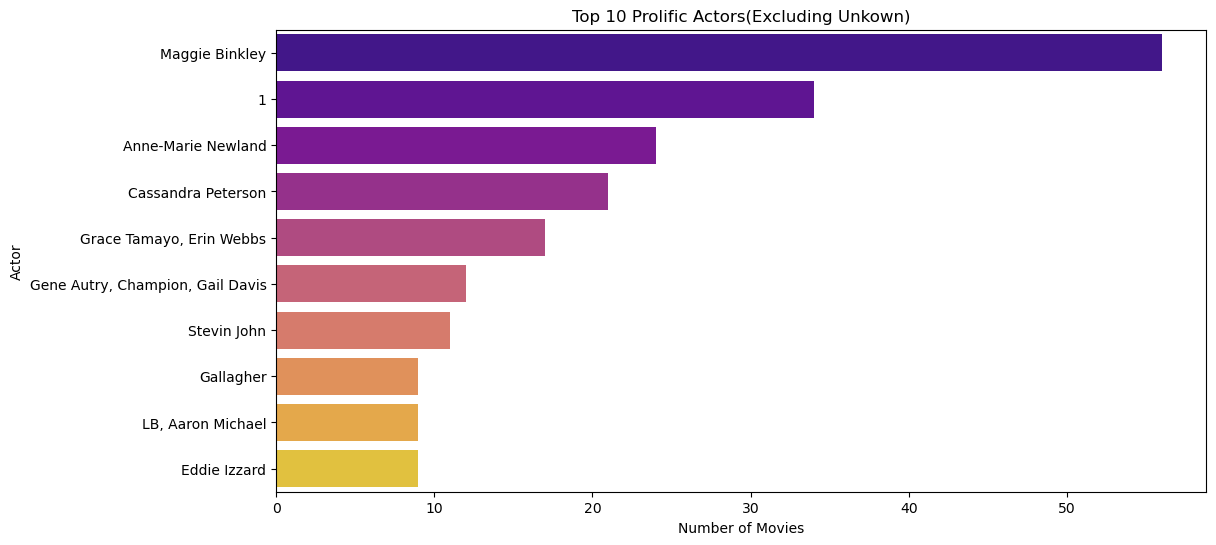

In [161]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values,y=top_actors.index,palette="plasma")
plt.title("Top 10 Prolific Actors(Excluding Unkown)")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show()

### Conclusion
The bar chart displays the top 10 most prolific actors(excluding unknown names)based on the number of movies they have appeared in maggie Binkely
leads with the highest number of films,followed by an unnamed actor. the list includes a mix of actors with varying film counts.with Eddie lzzard at the lower end.The color gradient from blue to orange represent the ranking making it visually clear who has the most appearances

In [162]:
df["type"].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

### Count of each content type(Movie vs.TV shows)

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\3998355210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="type",palette="viridis")


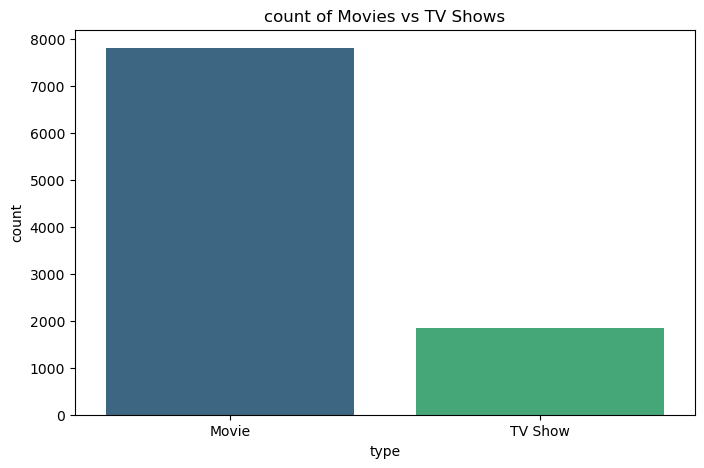

In [163]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="type",palette="viridis")
plt.title("count of Movies vs TV Shows")
plt.show()

The bar chart compares the count of Movies and Tv shows showing that Movies Significantly outnumber Tv Shows.the movie category has over 7,000
entries,whereas Tv shows are far fewer,around 1,500.This indicates that movies dominate the dataset,suggesting a stronger emphasis on films over tv series.


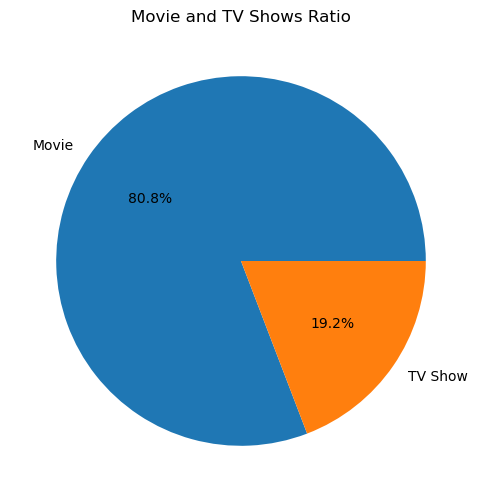

In [164]:
df_pie=df["type"].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(x=df_pie.values,labels=df_pie.index,autopct="%1.1f%%")
plt.title("Movie and TV Shows Ratio")
plt.show()

In [165]:
df["rating"].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [166]:
df.groupby("type")["rating"].value_counts()

type     rating  
Movie    13+         2180
         16+         1272
         18+         1097
         R           1010
         ALL          988
         PG-13        393
         7+           288
         PG           253
         NR           194
         G             93
         UNRATED       33
         AGES_18_       3
         NC-17          3
         NOT_RATE       3
         AGES_16_       2
         16             1
         ALL_AGES       1
TV Show  ALL          280
         16+          275
         13+          274
         TV-14        208
         TV-PG        169
         18+          146
         TV-NR        105
         7+            97
         TV-G          81
         TV-MA         77
         TV-Y          74
         TV-Y7         39
         NR            29
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

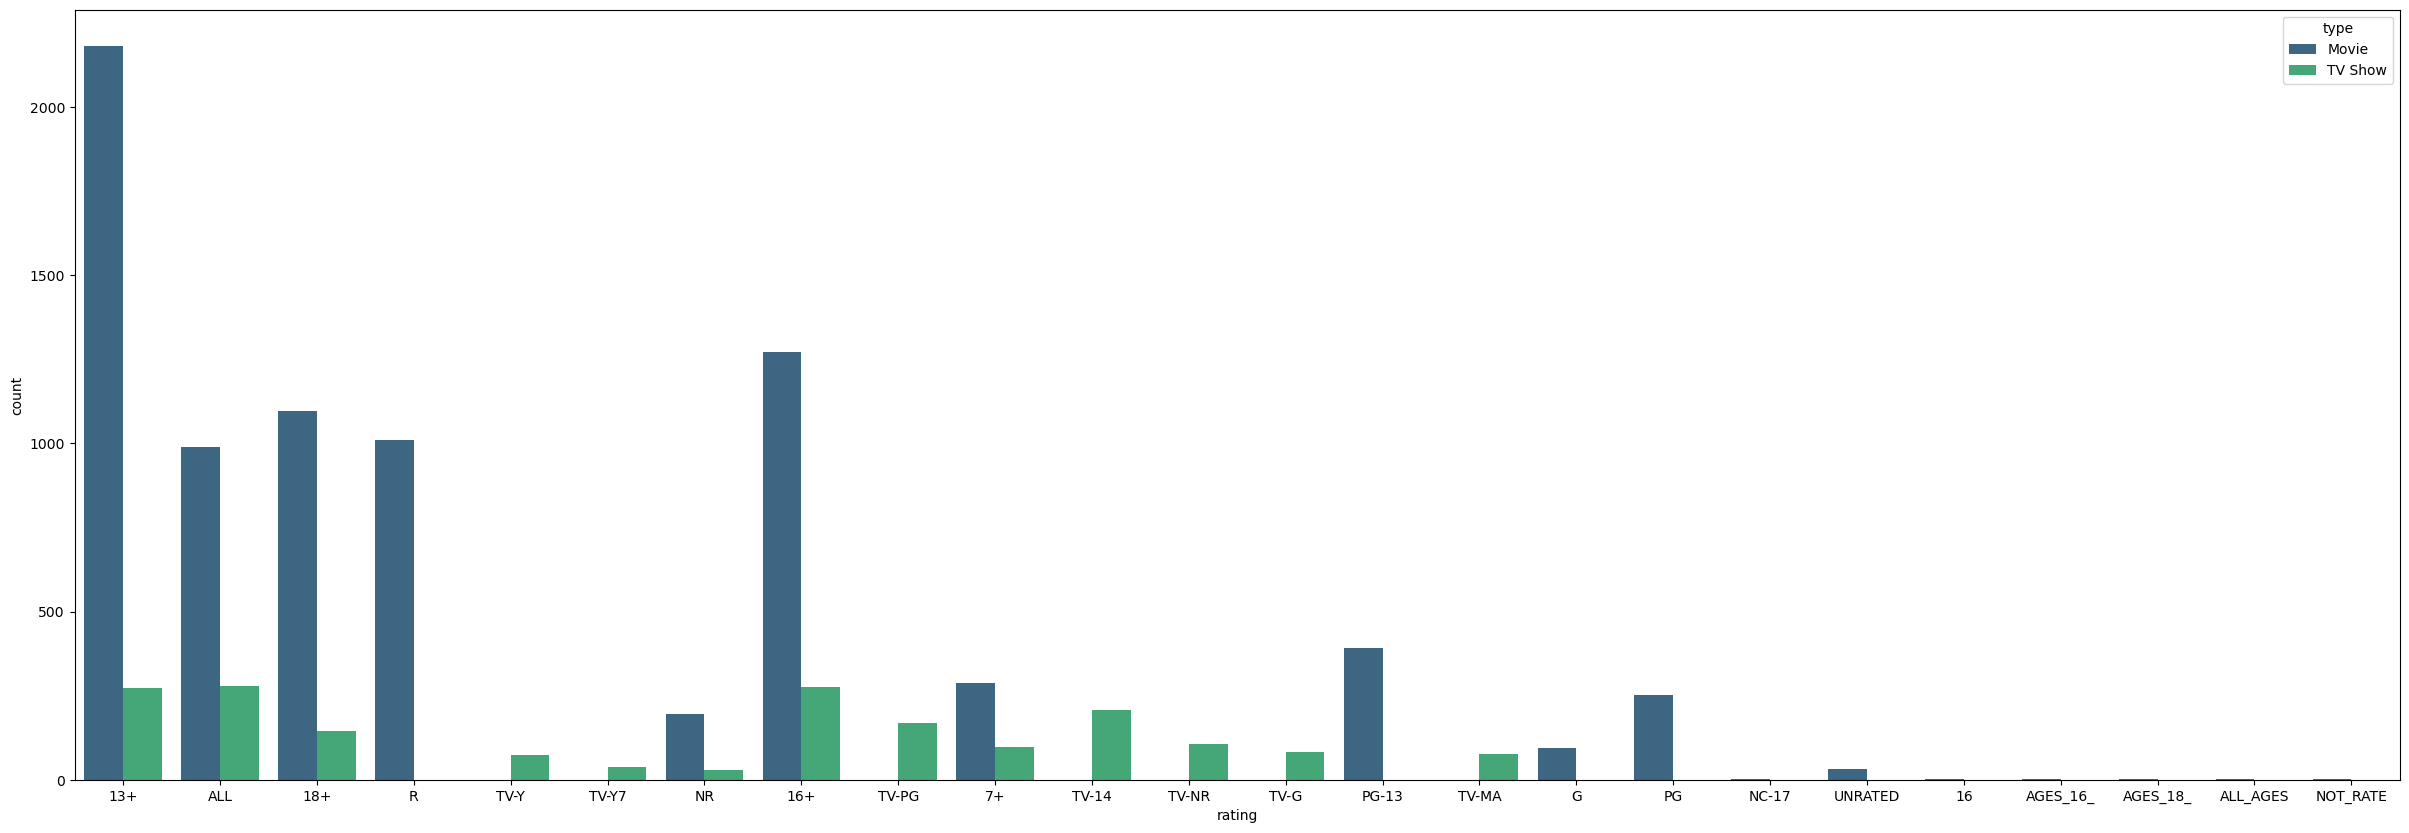

In [167]:
plt.figure(figsize=(30,10))
sns.countplot(x=df["rating"],data=df,hue="type",palette="viridis")

### cal the number of titles per country

In [168]:
filtered_country=df[df["country"]!="Unavailable"]
country_counts=filtered_country["country"].value_counts()

In [169]:
country_counts.head()

country
United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Name: count, dtype: int64

## Getting the top 3 countries

In [170]:
top_countries=country_counts.nlargest(3).index

In [171]:
top_countries

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

#### filtering the df to include only the top 3 countries

In [172]:
df_top_countries=filtered_country[filtered_country["country"].isin(top_countries)]

In [173]:
df_top_countries

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"
5,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,2021-03-30,1989,13+,52 min,"Fantasy, Kids"
...,...,...,...,...,...,...,...,...,...,...
9604,Movie,Bride Wars,Gary Winick,"Kate Hudson, Anne Hathaway, Kristen Johnston, ...",United States,2021-10-08,2009,PG,89 min,Comedy
9614,Movie,What Happens in Vegas,Tom Vaughan,"Cameron Diaz, Ashton Kutcher, Rob Corddry, ...",United States,2021-10-08,2008,PG-13,99 min,Comedy
9641,Movie,Marley & Me,David Frankel,"Owen Wilson, Jennifer Aniston",United States,2021-10-10,2008,PG,116 min,"Comedy, Drama, Kids"
9643,Movie,Love & Other Drugs,Edward Zwick,"K K, Jake Gyllenhaal, Anne Hathaway, Oliver Pl...",United States,2021-10-10,2010,R,112 min,"Comedy, Drama"


## plotting the number of titles released per top 3 countries

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\2807635819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_countries,x='country',palette='viridis')


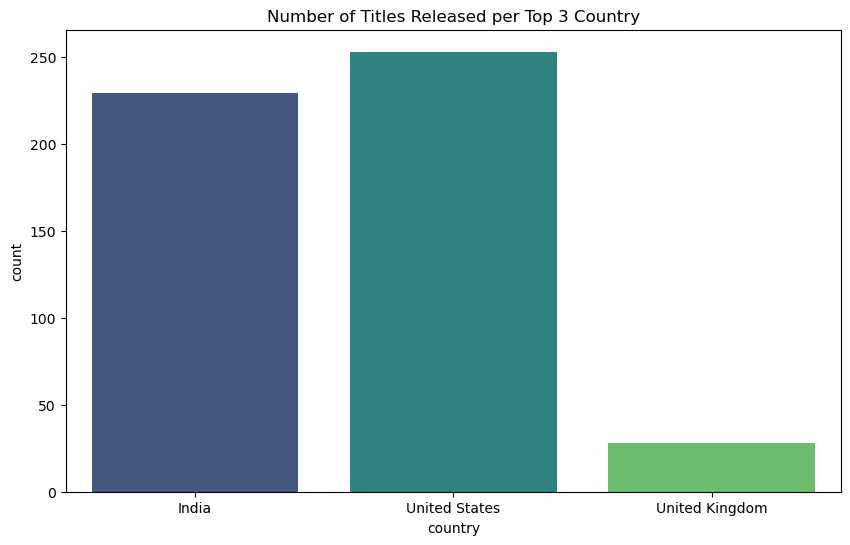

In [174]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries,x='country',palette='viridis')
plt.title('Number of Titles Released per Top 3 Country')
plt.show()

### plotting the number of titles released per top 3 countries

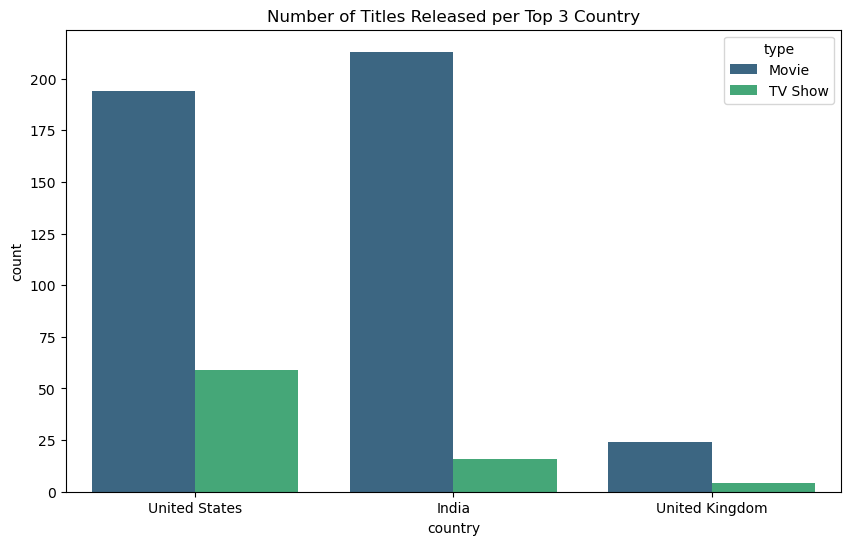

In [175]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries,x="country",hue="type",palette="viridis",order=top_countries)
plt.title("Number of Titles Released per Top 3 Country")
plt.show()

## plotting the number of titles released per top 10 years

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\409167498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_years,x="release_year",palette="viridis",order=top_years)


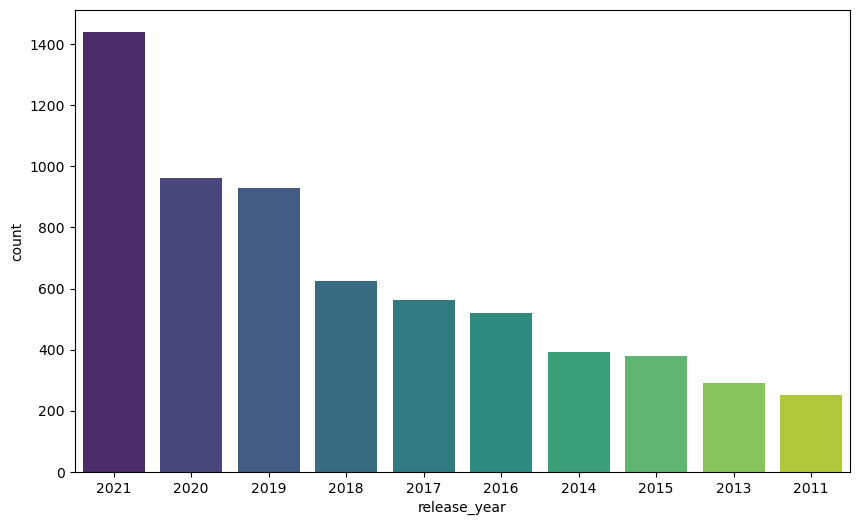

In [176]:
year_counts=df["release_year"].value_counts()
top_years=year_counts.nlargest(10).index
df_top_years=df[df["release_year"].isin(top_years)]
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x="release_year",palette="viridis",order=top_years)
plt.show()

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\3962532474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_years,x="release_year",palette="viridis")


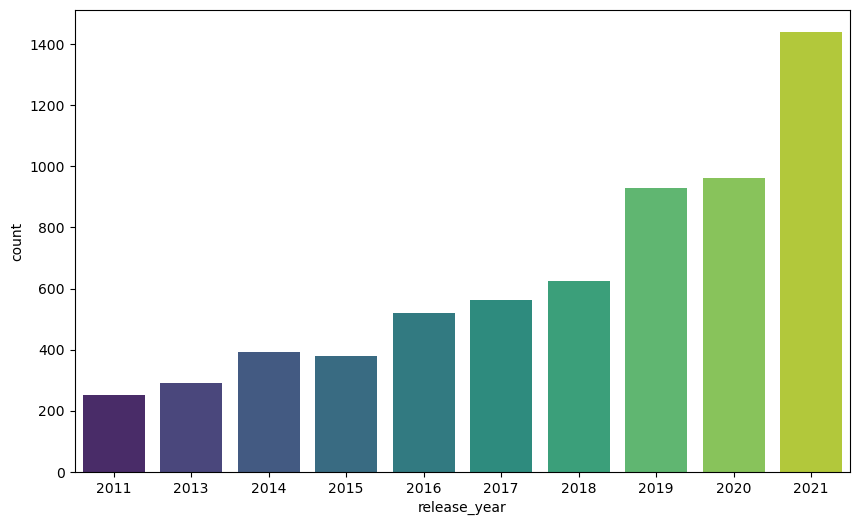

In [177]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x="release_year",palette="viridis")
plt.show()

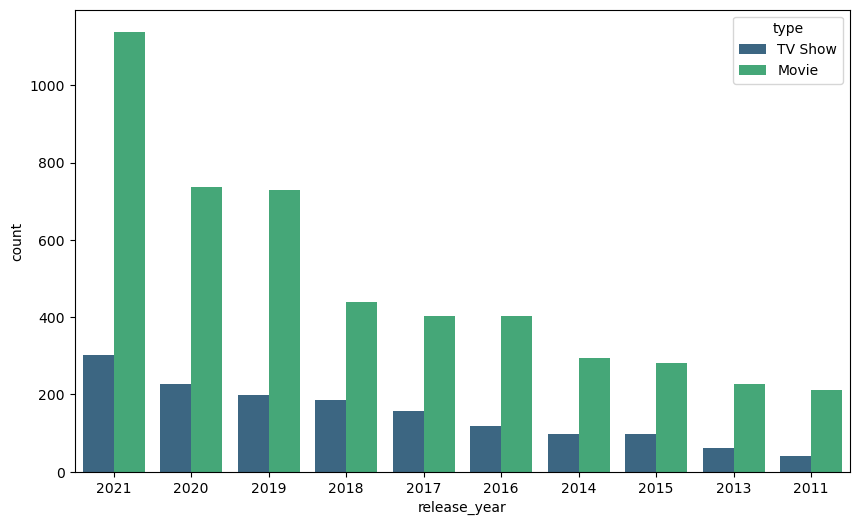

In [178]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x="release_year",hue="type",palette="viridis",order=top_years)
plt.show()

#### distribution of genres

#### splitting the genres

In [179]:
df["Genres"]=df["listed_in"].apply(lambda x:x.split(','))


In [180]:
genres_exploded=df.explode("Genres")

### exploding the genres into separate rows

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\1228530140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genres_exploded,y="Genres",order=genres_exploded["Genres"].value_counts().index,palette="viridis")


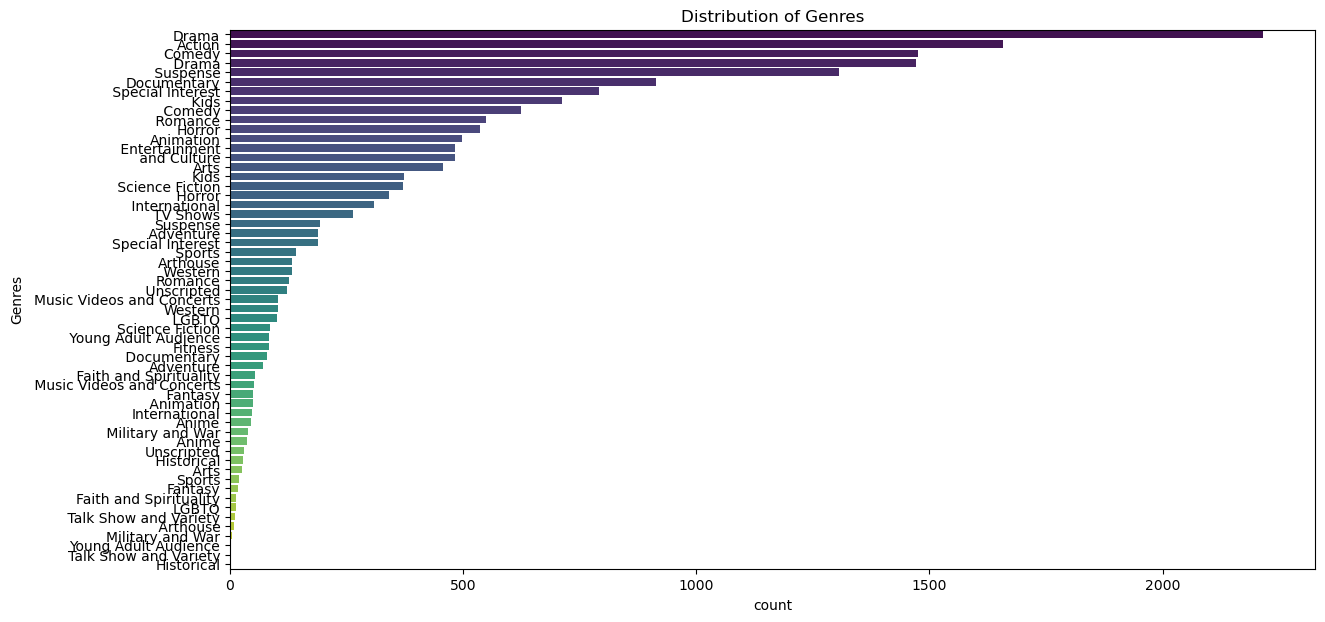

In [181]:
plt.figure(figsize=(14,7))
sns.countplot(data=genres_exploded,y="Genres",order=genres_exploded["Genres"].value_counts().index,palette="viridis")
plt.title("Distribution of Genres")
plt.show()

The bar graph display the distribution of different genres,with drama being the most prevalent,followed by Action,Comedt,and Documentary.The frequency
of genres decreases as we move down the list with niche genres like Historical,Talk Shows &Varirty,and Military & War appearing less frequently.the color
gradient Highlightsthe varation in genre counts.emphasizing the dominance of popular categories.

In [182]:
df["duration"].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

In [183]:
#filter data for movies and TV shows separately#
df_Movies=df[df["type"]=="Movie"].copy()
df_tv_shows=df[df["type"]=="TV Show"].copy()
#extract numeric duration for movies
df_Movies["duration_num"]=df_Movies["duration"].str.extract('(\d+)',expand=False).astype(float)
#extract numeric duration for TV Shows
df_tv_shows["duration_num"]=df_tv_shows["duration"].str.extract('(\d+)',expand=False).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\2874799549.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_Movies["duration_num"]=df_Movies["duration"].str.extract('(\d+)',expand=False).astype(float)
C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_7140\2874799549.py:4: SyntaxWarning: invalid escape sequence '\d'
  df_tv_shows["duration_num"]=df_tv_shows["duration"].str.extract('(\d+)',expand=False).astype(float)


In [184]:
df_Movies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Genres,duration_num
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama","[Comedy, Drama]",113.0
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International","[Drama, International]",110.0
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense","[Action, Drama, Suspense]",74.0
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary,[Documentary],69.0
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy","[Drama, Fantasy]",45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9660,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Unavailable,2021-10-10,2021,13+,96 min,Comedy,[Comedy],96.0
9662,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Unavailable,2021-10-10,2021,16+,93 min,"Drama, Science Fiction, Suspense","[Drama, Science Fiction, Suspense]",93.0
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unavailable,2021-10-10,1940,7+,60 min,Comedy,[Comedy],60.0
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unavailable,2021-10-10,2008,R,90 min,Action,[Action],90.0


In [185]:
plt.figure(figsize=(12,12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

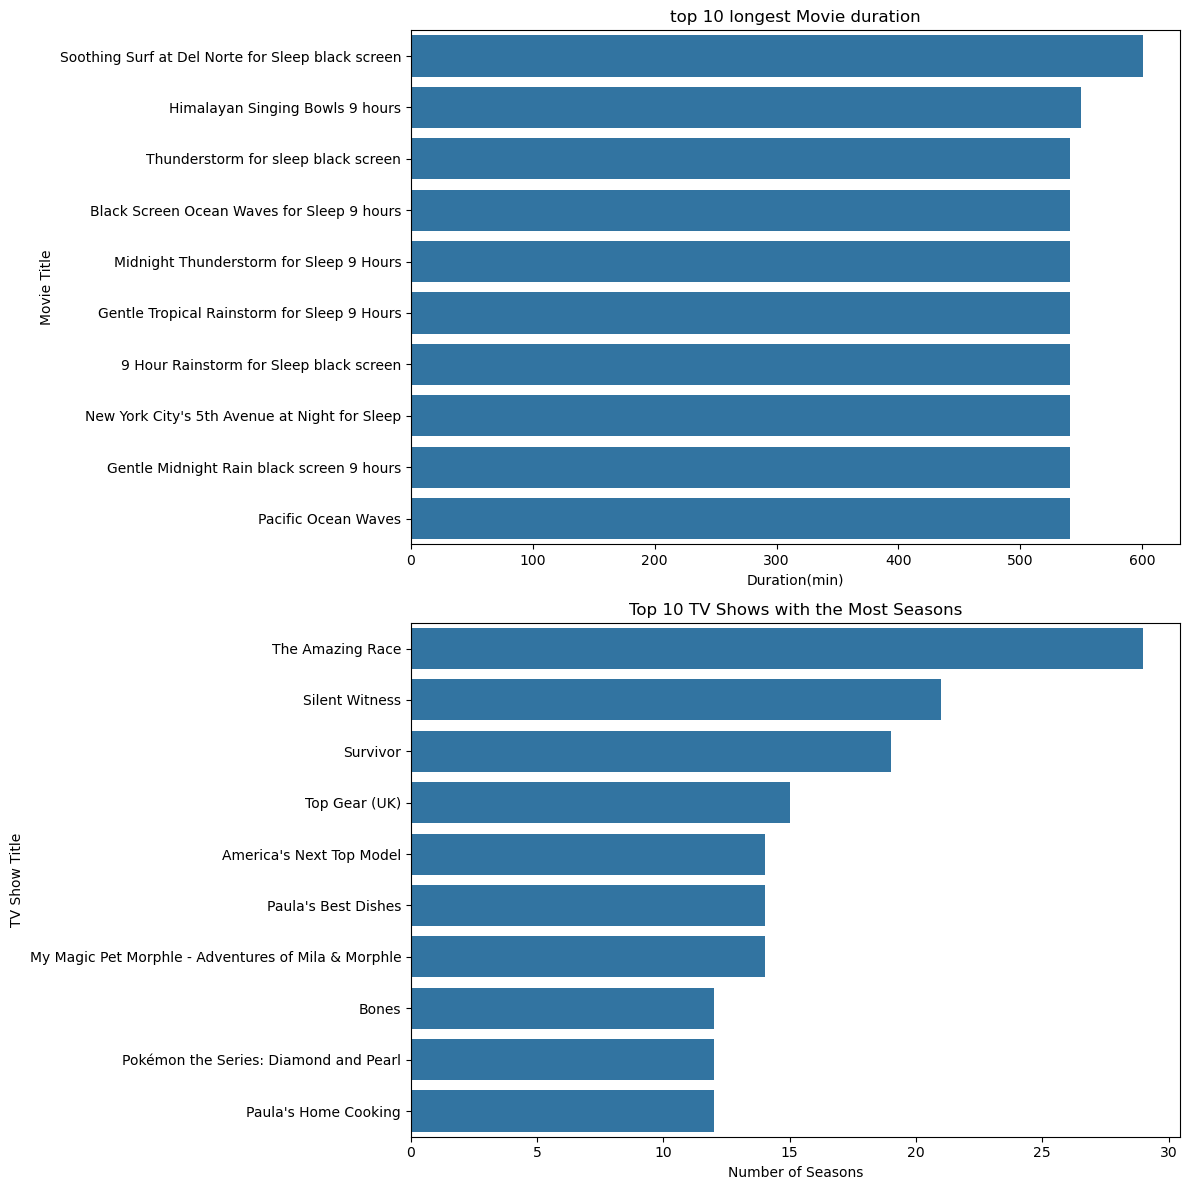

In [186]:
#Plotting
plt.figure(figsize=(12,12))
#subplot 1: Top 10 Longest movie duration
plt.subplot(2,1,1)
sns.barplot(data=df_Movies.sort_values(by="duration_num",ascending=False).head(10),y="title",x="duration_num",orient="horizontal")
plt.title("top 10 longest Movie duration")
plt.xlabel("Duration(min)")
plt.ylabel("Movie Title")
#subplot 2: Top 10 Tv shows with most seasons
plt.subplot(2,1,2)
sns.barplot(data=df_tv_shows.sort_values(by="duration_num",ascending=False).head(10),y="title",x="duration_num",orient="horizontal")
plt.title("Top 10 TV Shows with the Most Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("TV Show Title")
plt.tight_layout()
plt.show()
            

### Conclusion

1 The bar chart display the top 10 longest movie durations,with all movies having a duration of around 9 hours,The titles suggest that these movies 
primarily features relaxing sounds like ocean waves,thunderstorms,and rain,often with a black screen to aidaleep.this indicates a trend where lomg-duration
ambient movies are popular for relaxation and sleep purposes.

2 The bar chart Shiwcases the Top 10 Tv shows with the most Seasons."The Amazing Race" leads the list,followed by "Silent Witness"and "Survivor."
The graph Highlights  long-running series across various genres with the number of seasons decreasing down list this visualization provides insight into the most enduring TV shows in terms of Season count.
